# Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf

%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Setup

In [2]:
import gym
env = gym.make("CartPole-v0")

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
obs = env.reset()

In [4]:
obs

array([ 4.58414760e-02,  3.35433096e-02, -4.78487331e-02, -1.86193613e-06])

In [5]:
pos, vel, ang, ang_vel = obs
print(pos)
print(vel)
print(ang)
print(ang_vel)

0.04584147598099239
0.03354330957985065
-0.047848733104548846
-1.8619361260713285e-06


In [6]:
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


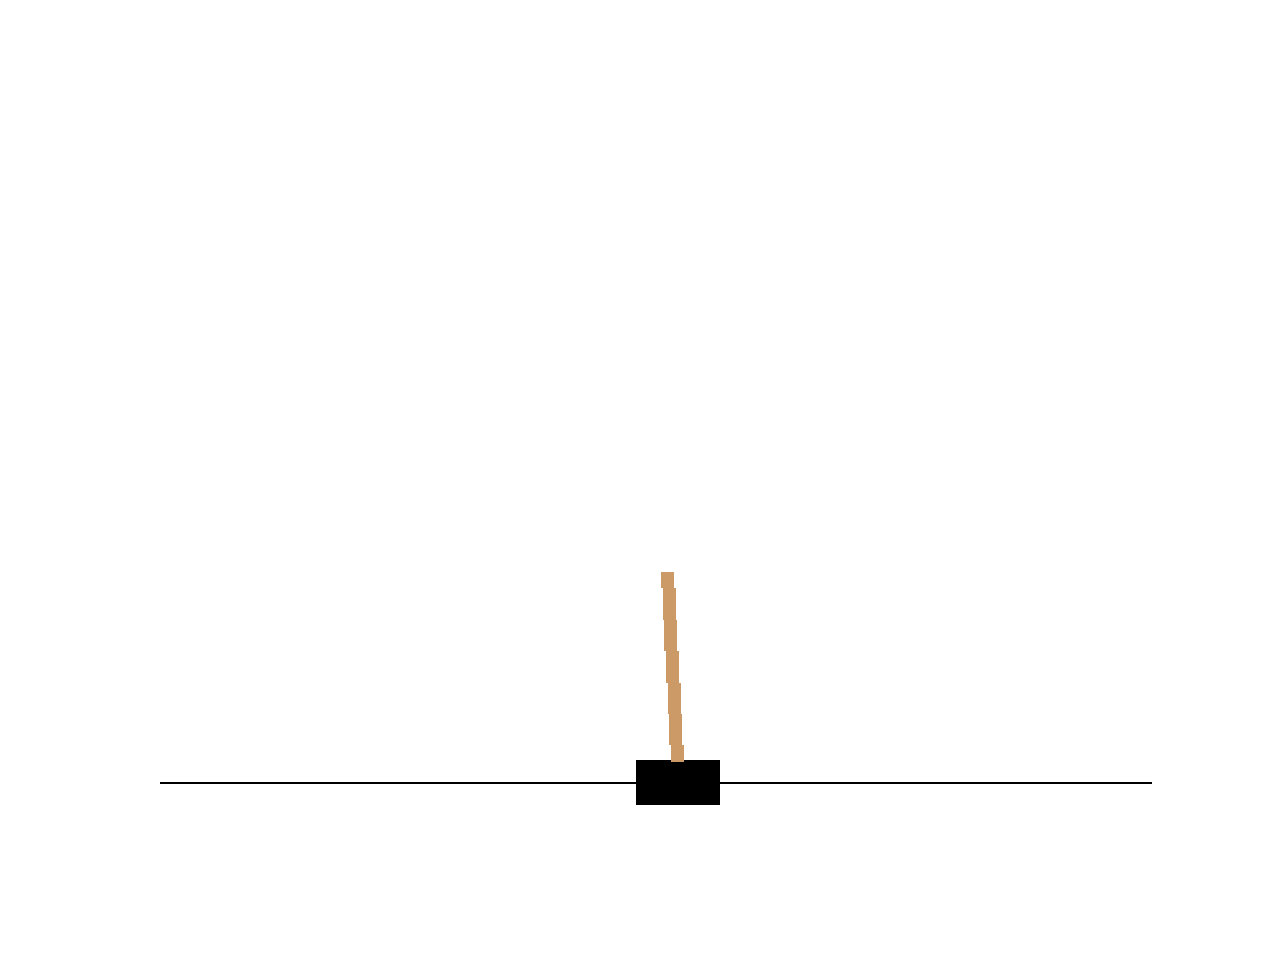

In [7]:
plot_cart_pole(env, obs);

# Experimentation

In [8]:
env.action_space

Discrete(2)

## Take 1 step right

[-0.0342499   0.18170733  0.02167454 -0.26714376]
1.0
False


<IPython.core.display.Javascript object>


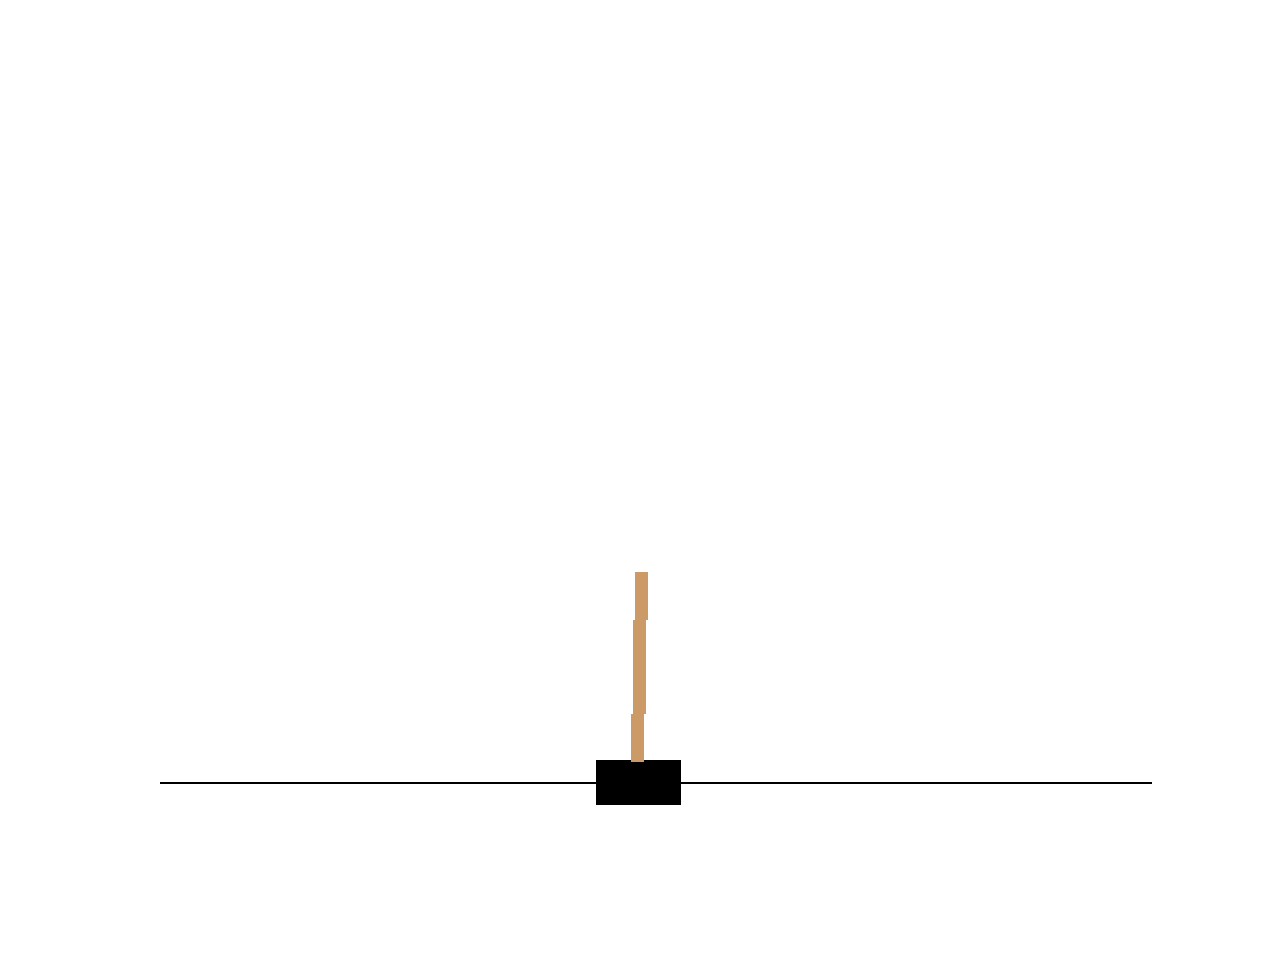

(-0.5, 599.5, 399.5, -0.5)

In [14]:
obs = env.reset()
obs, reward, done, info = env.step(1)
print(obs)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

## Take 1 step left

[-0.04616342 -0.20879473 -0.03022067  0.28415877]
1.0
False


<IPython.core.display.Javascript object>


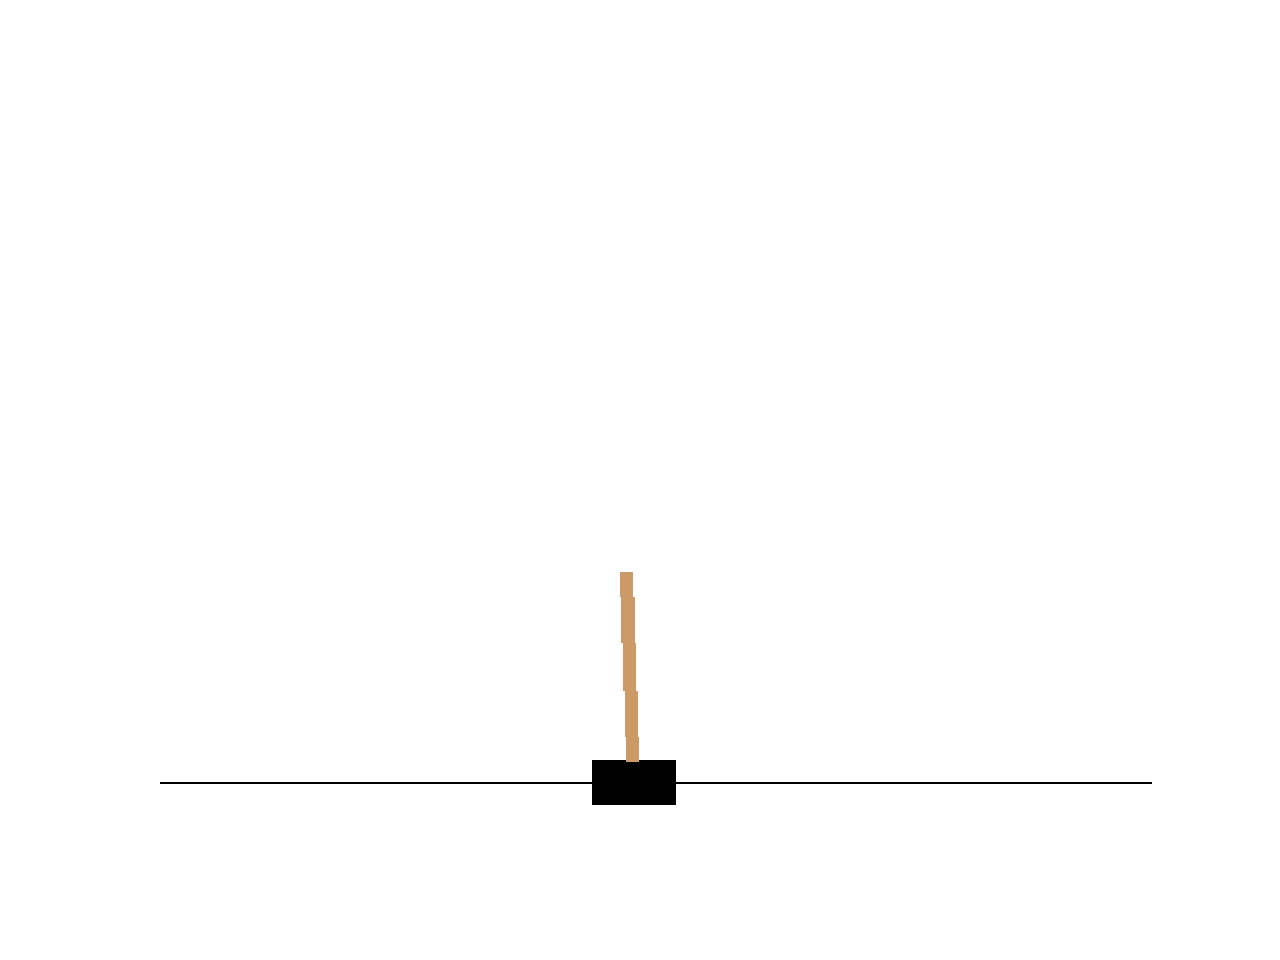

(-0.5, 599.5, 399.5, -0.5)

In [15]:
obs = env.reset()
obs, reward, done, info = env.step(0)
print(obs)
print(reward)
print(done)

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

## Keep going left until fall

[-0.01404448 -0.16869069 -0.00533231  0.26816803]
[-1.74182977e-02 -3.63736140e-01  3.10490955e-05  5.59164349e-01]
[-0.02469302 -0.55885853  0.01121434  0.85185706]
[-0.03587019 -0.75413156  0.02825148  1.14804513]
[-0.05095282 -0.94961073  0.05121238  1.44945171]
[-0.06994504 -1.14532341  0.08020141  1.7576857 ]
[-0.0928515  -1.34125714  0.11535513  2.07419553]
[-0.11967665 -1.53734562  0.15683904  2.40021268]
[-0.15042356 -1.73345218  0.20484329  2.73668385]
[-0.1850926  -1.92935099  0.25957697  3.08419218]


<IPython.core.display.Javascript object>


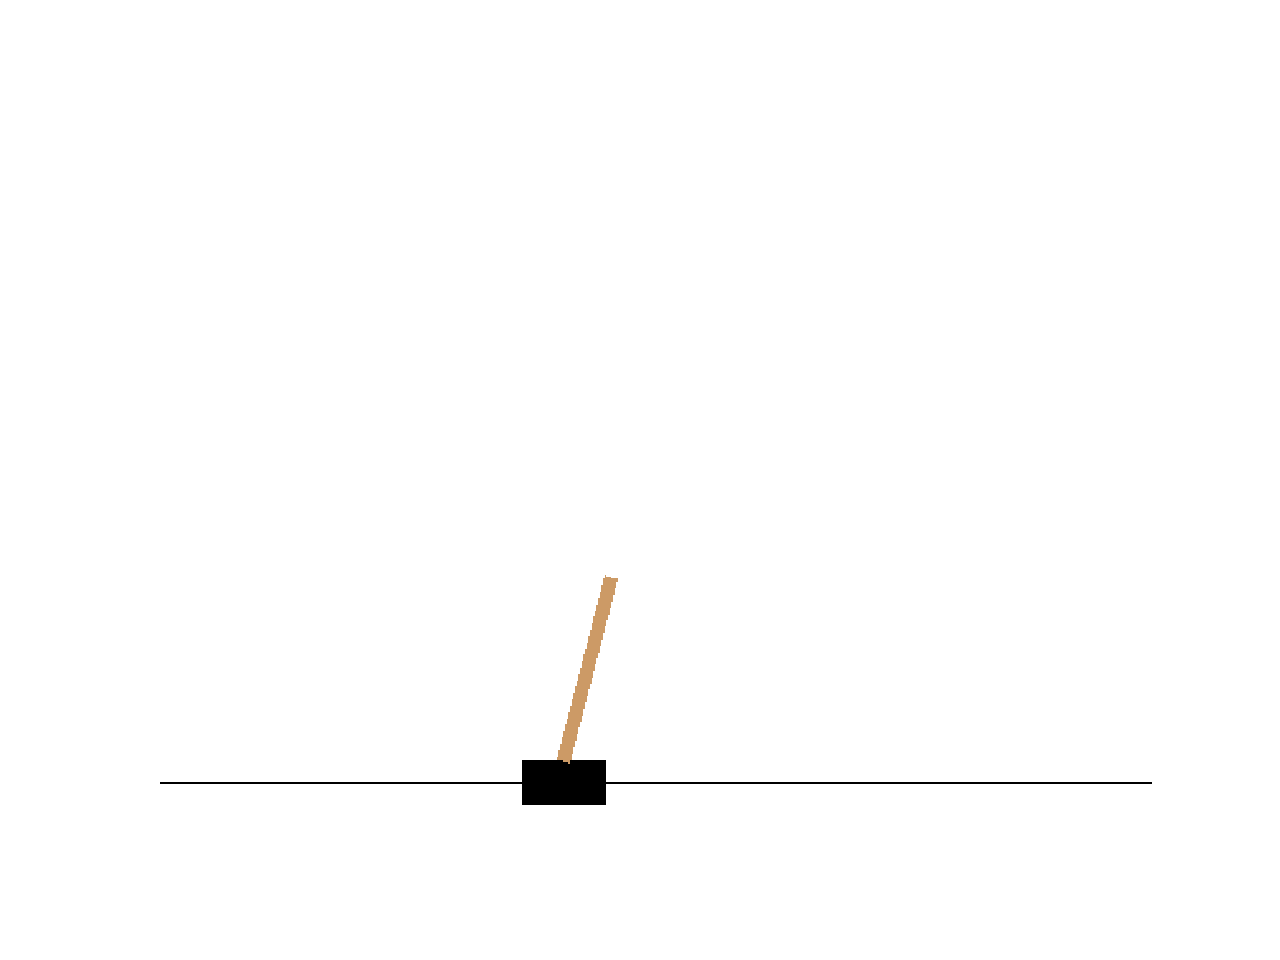

(-0.5, 599.5, 399.5, -0.5)

In [16]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    print(obs)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

## Keep going right until fall

[-0.02279496  0.19046133  0.04515714 -0.31439121]
[-0.01898574  0.3849119   0.03886932 -0.59249804]
[-0.0112875   0.57946878  0.02701936 -0.87268823]
[ 3.01875517e-04  7.74213099e-01  9.56559479e-03 -1.15675536e+00]
[ 0.01578614  0.96920906 -0.01356951 -1.44642367]
[ 0.03517032  1.16449526 -0.04249799 -1.74331533]
[ 0.05846022  1.36007416 -0.07736429 -2.04890944]
[ 0.08566171  1.55589908 -0.11834248 -2.36449063]
[ 0.11677969  1.75185857 -0.16563229 -2.6910855 ]
[ 0.15181686  1.94775817 -0.219454   -3.02938691]


<IPython.core.display.Javascript object>


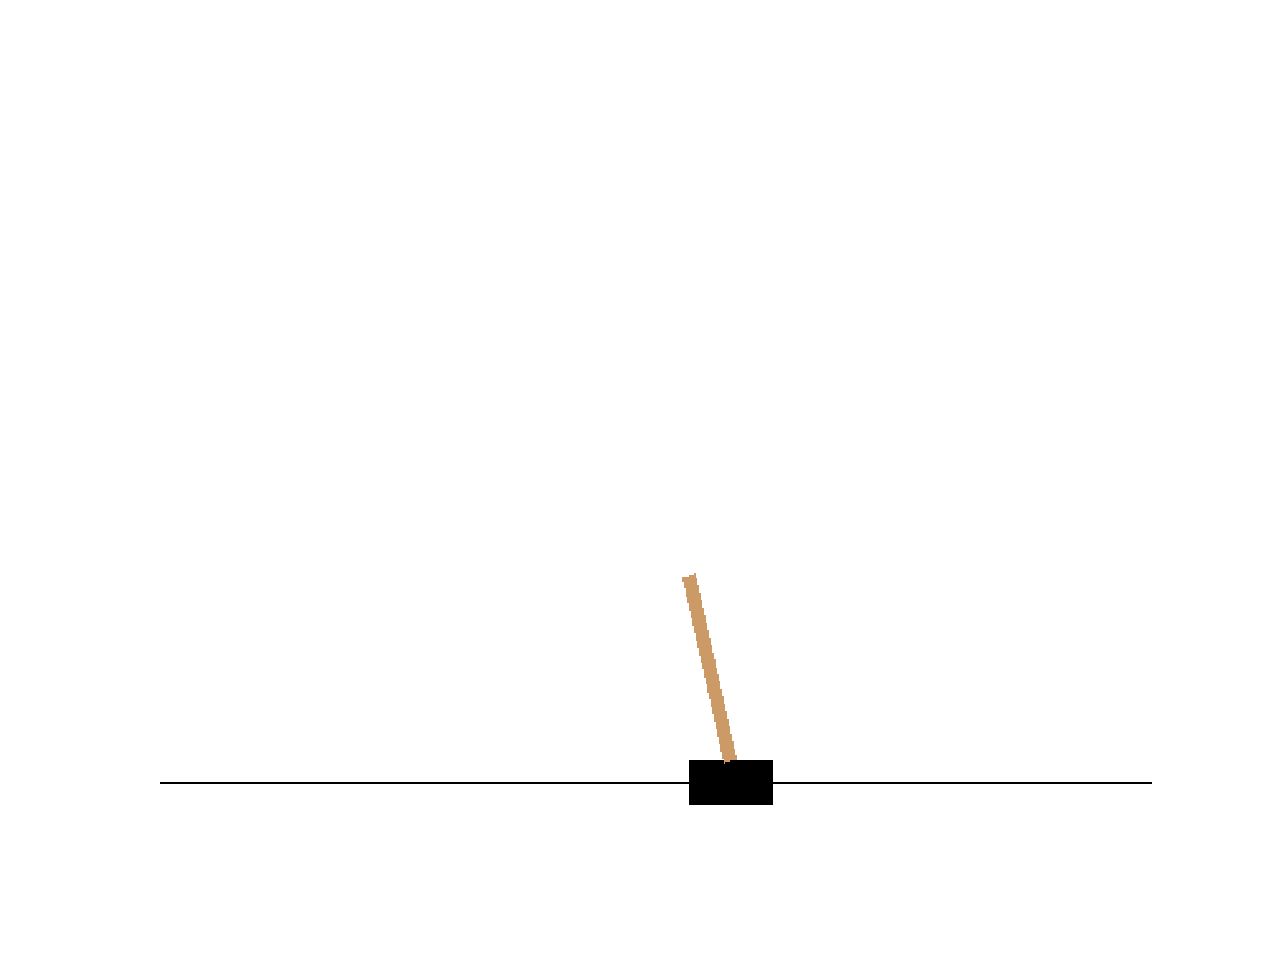

(-0.5, 599.5, 399.5, -0.5)

In [18]:
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    print(obs)
    if done:
        break

plt.close()  # or else nbagg sometimes plots in the previous cell
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")

# Improve Cart-Pole

## Animation functions

In [31]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

## Custom Policy
1. if angle and angular_velocity are both <0, then it is definitely failling right => move left
2. if angle and angular_velocity are both >0, then it is definitely failling left => move right
3. if above are both false => just move random for 1 step

In [19]:
def custom_policy(obs, env):
    ang = obs[2]
    ang_vel = obs[3]
    if ang<0 and ang_vel<0: # falling right
        return 0
    if ang>0 and ang_vel>0: # falling left
        return 1    
    return env.action_space.sample() # play randomly

In [20]:
print(env._max_episode_steps)

200


In [22]:
def run_policy(num_of_episodes, max_steps=None):
    if max_steps is not None:
        env._max_episode_steps = max_steps
    print("Max episode steps:", env._max_episode_steps)
    frames = []
    rewards = []
    for episode in range(num_of_episodes):
        episode_reward = 0
        obs = env.reset()
        for step in range(env._max_episode_steps):
            if episode==0: # check out 1 animation
                img = render_cart_pole(env, obs)
                frames.append(img)

            action = custom_policy(obs, env)
            obs, reward, done, info = env.step(action)        
            episode_reward += reward
            if done:            
                break
        rewards.append(episode_reward)
        print(episode, episode_reward)
    return rewards, frames

### Try with the definition of `solved` as per the docs – 100 consecutive trials with default max_episode_steps

In [28]:
rewards, frames = run_policy(100)

Max episode steps: 200
0 200.0
1 200.0
2 200.0
3 200.0
4 200.0
5 200.0
6 200.0
7 200.0
8 200.0
9 200.0
10 200.0
11 200.0
12 200.0
13 200.0
14 200.0
15 200.0
16 200.0
17 200.0
18 200.0
19 200.0
20 200.0
21 200.0
22 200.0
23 200.0
24 200.0
25 200.0
26 200.0
27 200.0
28 200.0
29 200.0
30 200.0
31 200.0
32 200.0
33 200.0
34 200.0
35 200.0
36 200.0
37 200.0
38 200.0
39 200.0
40 200.0
41 200.0
42 200.0
43 200.0
44 200.0
45 200.0
46 200.0
47 200.0
48 200.0
49 200.0
50 200.0
51 200.0
52 200.0
53 200.0
54 200.0
55 200.0
56 200.0
57 200.0
58 200.0
59 200.0
60 200.0
61 200.0
62 200.0
63 200.0
64 200.0
65 200.0
66 200.0
67 200.0
68 200.0
69 200.0
70 200.0
71 200.0
72 200.0
73 200.0
74 200.0
75 200.0
76 200.0
77 200.0
78 200.0
79 200.0
80 200.0
81 200.0
82 200.0
83 200.0
84 200.0
85 200.0
86 200.0
87 200.0
88 200.0
89 200.0
90 200.0
91 200.0
92 200.0
93 200.0
94 200.0
95 200.0
96 200.0
97 200.0
98 200.0
99 200.0


In [29]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(200.0, 0.0, 200.0, 200.0)

<IPython.core.display.Javascript object>


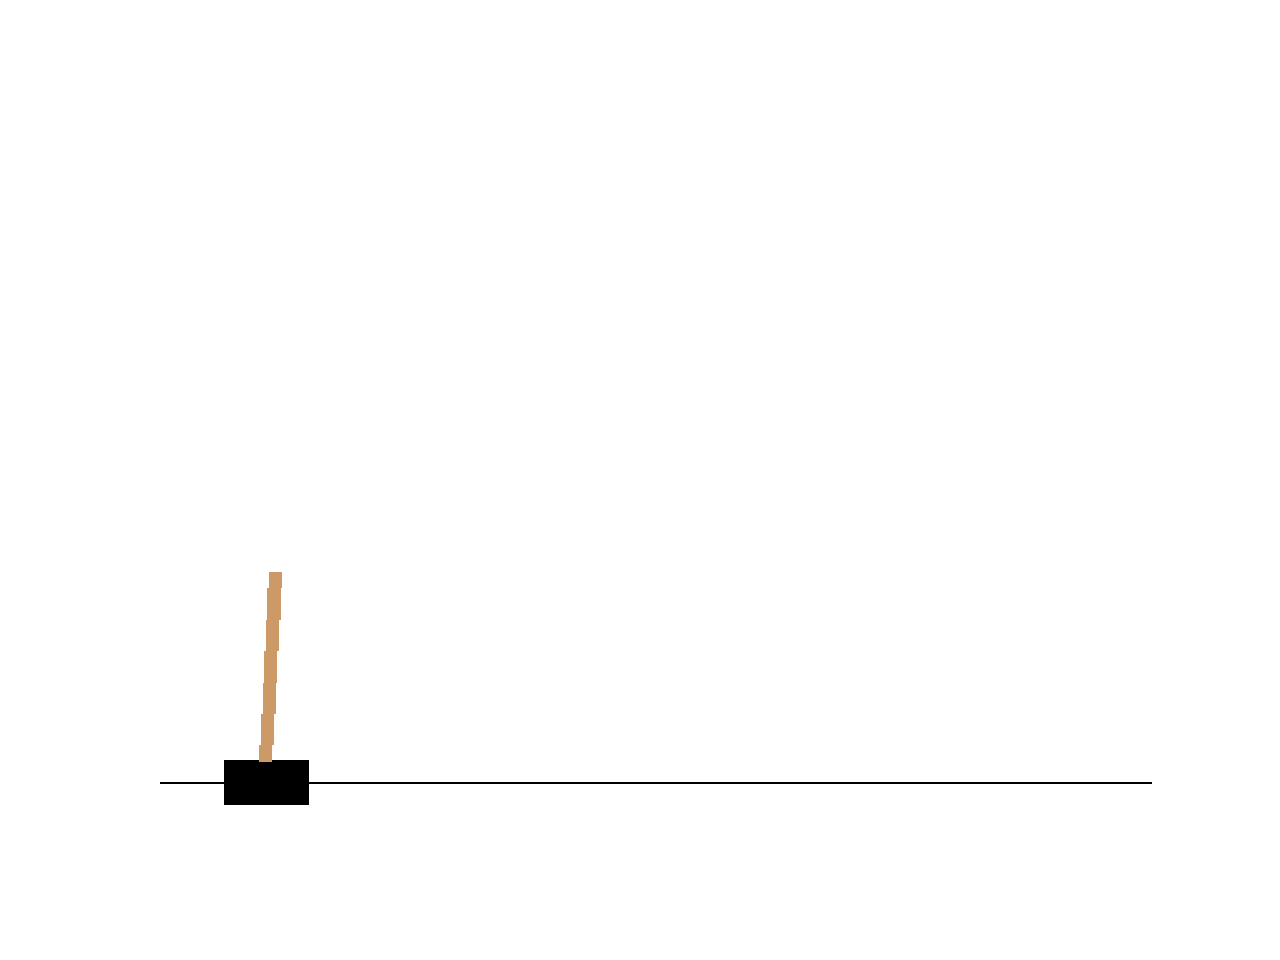

In [32]:
video = plot_animation(frames)
plt.show()

### Try with 100 consecutive trials with max_episode_steps as 1000

In [33]:
rewards, frames = run_policy(100, 1000)

Max episode steps: 1000
0 447.0
1 441.0
2 463.0
3 1000.0
4 1000.0
5 1000.0
6 548.0
7 461.0
8 984.0
9 428.0
10 563.0
11 789.0
12 361.0
13 535.0
14 917.0
15 654.0
16 908.0
17 699.0
18 424.0
19 359.0
20 387.0
21 340.0
22 429.0
23 862.0
24 498.0
25 742.0
26 410.0
27 766.0
28 1000.0
29 541.0
30 1000.0
31 503.0
32 1000.0
33 671.0
34 322.0
35 542.0
36 549.0
37 511.0
38 430.0
39 812.0
40 300.0
41 538.0
42 350.0
43 597.0
44 733.0
45 1000.0
46 1000.0
47 560.0
48 528.0
49 1000.0
50 310.0
51 331.0
52 1000.0
53 428.0
54 656.0
55 688.0
56 584.0
57 980.0
58 253.0
59 459.0
60 334.0
61 642.0
62 680.0
63 1000.0
64 1000.0
65 1000.0
66 509.0
67 412.0
68 1000.0
69 582.0
70 501.0
71 950.0
72 536.0
73 645.0
74 585.0
75 250.0
76 496.0
77 656.0
78 554.0
79 455.0
80 554.0
81 764.0
82 357.0
83 1000.0
84 1000.0
85 1000.0
86 553.0
87 609.0
88 736.0
89 768.0
90 1000.0
91 510.0
92 403.0
93 477.0
94 331.0
95 524.0
96 915.0
97 306.0
98 547.0
99 234.0


In [34]:
np.mean(rewards), np.std(rewards), np.min(rewards), np.max(rewards)

(629.66, 237.18381985287274, 234.0, 1000.0)

<IPython.core.display.Javascript object>


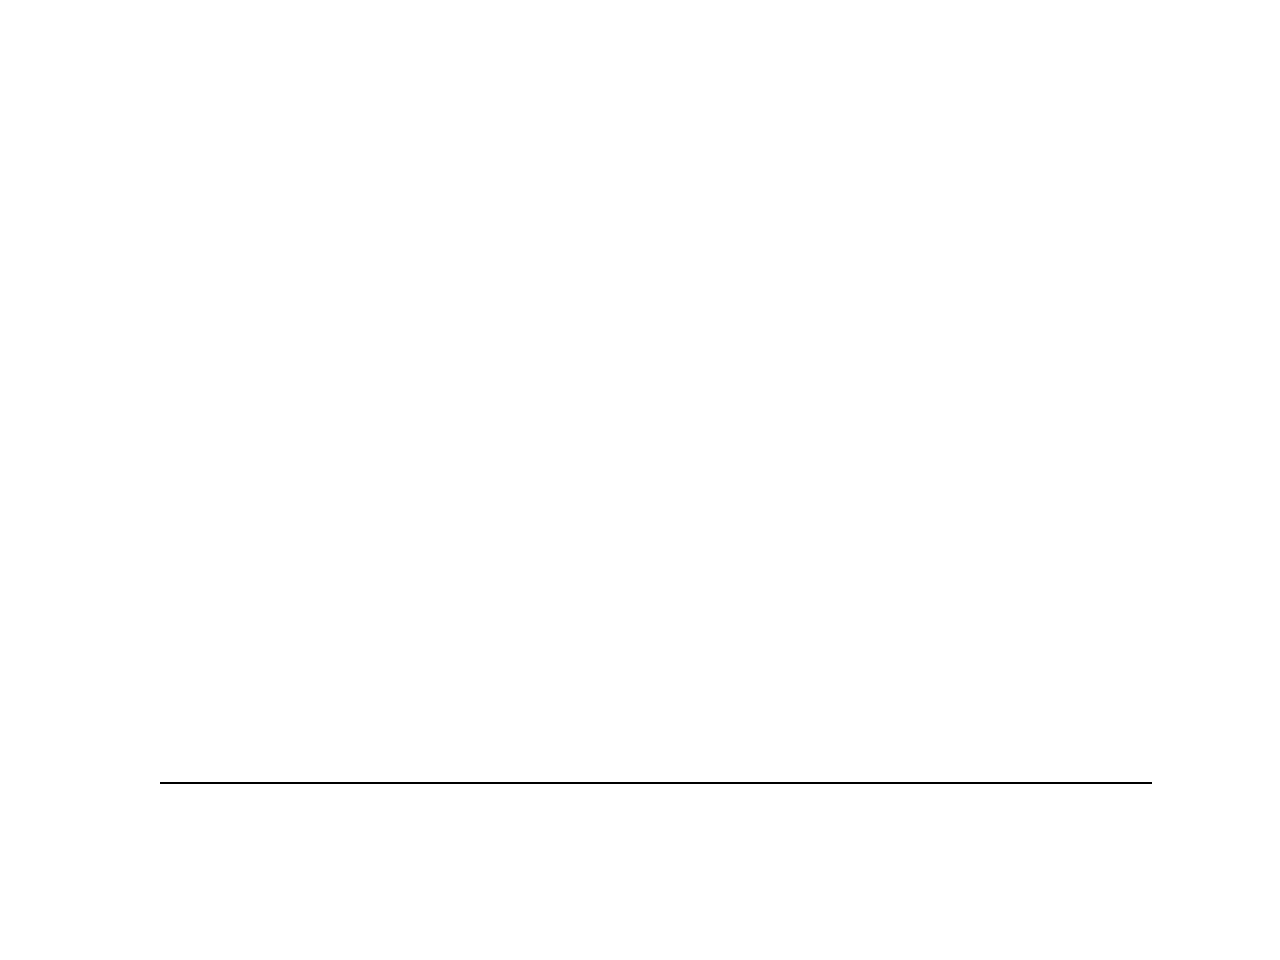

In [35]:
video = plot_animation(frames)
plt.show()